# SENTIMENT ANALYSIS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import seaborn as sns

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akuratikaustiki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from wordcloud import WordCloud, STOPWORDS

**We load the first 100000 data of the dataset as follows**

In [ ]:
users = []
with open('yelp_academic_dataset_review.json') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
        if i+1 >= 100000:
            break
rev = pd.DataFrame(users)
rev.head()

review_id                 user_id             business_id  \
0  lWC-xP3rd6obsecCYsGZRg  ak0TdVmGKo4pwqdJSTLwWw  buF9druCkbuXLX526sGELQ   
1  8bFej1QE5LXp4O05qjGqXA  YoVfDbnISlW0f7abNQACIg  RA4V8pr014UyUbDvI-LW2A   
2  NDhkzczKjLshODbqDoNLSg  eC5evKn1TWDyHCyQAwguUw  _sS2LBIGNT5NQb6PD1Vtjw   
3  T5fAqjjFooT4V0OeZyuk1w  SFQ1jcnGguO0LYWnbbftAA  0AzLzHfOJgL7ROwhdww2ew   
4  sjm_uUcQVxab_EeLCqsYLg  0kA0PAJ8QFMeveQWHFqz2A  8zehGz9jnxPqXtOc7KaJxA   

   stars  useful  funny  cool  \
0    4.0       3      1     1   
1    4.0       1      0     0   
2    5.0       0      0     0   
3    2.0       1      1     1   
4    4.0       0      0     0   

                                                text                 date  
0  Apparently Prides Osteria had a rough summer a...  2014-10-11 03:34:02  
1  This store is pretty good. Not as great as Wal...  2015-07-03 20:38:25  
2  I called WVM on the recommendation of a couple...  2013-05-28 20:38:06  
3  I've stayed at many Marriott and Renaissance M...  2010-01-08 02:29:15  
4  The food is always great here. The service fro...  2011-07-28 18:05:01

In [ ]:
rev

review_id                 user_id             business_id  \
0      lWC-xP3rd6obsecCYsGZRg  ak0TdVmGKo4pwqdJSTLwWw  buF9druCkbuXLX526sGELQ   
1      8bFej1QE5LXp4O05qjGqXA  YoVfDbnISlW0f7abNQACIg  RA4V8pr014UyUbDvI-LW2A   
2      NDhkzczKjLshODbqDoNLSg  eC5evKn1TWDyHCyQAwguUw  _sS2LBIGNT5NQb6PD1Vtjw   
3      T5fAqjjFooT4V0OeZyuk1w  SFQ1jcnGguO0LYWnbbftAA  0AzLzHfOJgL7ROwhdww2ew   
4      sjm_uUcQVxab_EeLCqsYLg  0kA0PAJ8QFMeveQWHFqz2A  8zehGz9jnxPqXtOc7KaJxA   
...                       ...                     ...                     ...   
99995  9DH7YZmu830JprYIN4IrZg  wCsUDt0ZgcTVXj3oyiqmpw  3cLBtLFiH8IRdlEy9S8RiQ   
99996  K80y3WKsxCzs8ABVMsQROw  XYpKK63VKDgqgKfltDtuoQ  1V5AWwFsxrlUsSo2B6MEEA   
99997  8YyVjURSI9yI24tk-aXudg  Bf03D8paZqH0FWPBN_5yQg  w4vP6vhfb65Te66zOO2Hug   
99998  SsI1fgPRnNNU1Z6LR8rgsw  c9TXAfOlLeTTteGI_VV0Og  8u_pdcdN66D1dmIZrNK55w   
99999  FQglXdOrStROXkx9a98Ieg  UNDhCRapbwVY0sF4MGhW0Q  5Qt0Zo4z6pGLFfscU5gS3w   

       stars  useful  funny  cool  \
0        4.0       3      1     1   
1        4.0       1      0     0   
2        5.0       0      0     0   
3        2.0       1      1     1   
4        4.0       0      0     0   
...      ...     ...    ...   ...   
99995    2.0       1      0     0   
99996    4.0       9      0     2   
99997    5.0       1      0     0   
99998    4.0       0      0     0   
99999    1.0       1      0     0   

                                                    text                 date  
0      Apparently Prides Osteria had a rough summer a...  2014-10-11 03:34:02  
1      This store is pretty good. Not as great as Wal...  2015-07-03 20:38:25  
2      I called WVM on the recommendation of a couple...  2013-05-28 20:38:06  
3      I've stayed at many Marriott and Renaissance M...  2010-01-08 02:29:15  
4      The food is always great here. The service fro...  2011-07-28 18:05:01  
...                                                  ...                  ...  
99995  I figured I would try this place based on so m...  2017-08-31 15:54:00  
99996  We were there for lunch on April 26th. We opte...  2011-04-27 14:37:44  
99997  Stopped in here after returning from a trip. A...  2017-10-27 01:17:18  
99998  Who doesn't love Wendy's! This one however is ...  2012-07-01 17:24:39  
99999  Unfortunately this is one of the worst of the ...  2015-07-30 17:57:09  

[100000 rows x 9 columns]

# # **Libraries Used for Modeling**

**We look at the size, properties and shape of the dataset using the shape and info() functions.**

In [ ]:
rev.shape
print(rev.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float64
 4   useful       100000 non-null  int64  
 5   funny        100000 non-null  int64  
 6   cool         100000 non-null  int64  
 7   text         100000 non-null  object 
 8   date         100000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB
None


**We observe that we have 100000 data from 0 to 99999, it has 9 types of columns, five of which are held as objects and three as numbers (two integers, one float). In addition, we see that the number of stars for the criticism is kept with (1-5) stars and useful, funny and cool features are defined for the criticism.**

**In the following cells we will remove some columns that will not be used in our analysis; we will calculate and add the length of the text column and display our final data.**

In [ ]:
reviews = rev.drop(['date','business_id','review_id','user_id'], axis =1)

In [ ]:
reviews['text length'] = rev['text'].apply(len)
reviews.head()

stars  useful  funny  cool  \
0    4.0       3      1     1   
1    4.0       1      0     0   
2    5.0       0      0     0   
3    2.0       1      1     1   
4    4.0       0      0     0   

                                                text  text length  
0  Apparently Prides Osteria had a rough summer a...         1856  
1  This store is pretty good. Not as great as Wal...          701  
2  I called WVM on the recommendation of a couple...          578  
3  I've stayed at many Marriott and Renaissance M...          390  
4  The food is always great here. The service fro...          181

**Then we will check if our data contains null values **

In [ ]:
reviews.isnull().any().any()

False

**There are no null values in our data.**

**Then we will create a count plot to display the distribution of stars in our dataset.**

Text(0, 0.5, 'count')

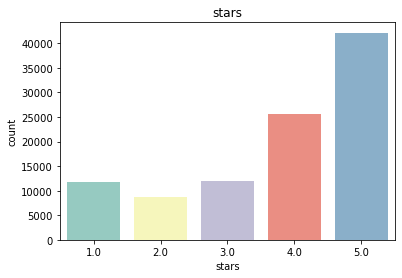

In [ ]:
cplot = sns.countplot(x='stars', data=reviews, palette="Set3")
cplot.set_title('stars')
cplot.set_ylabel('count')

**We observe that our data is skewed to the left and the number of 5 stars is higher.**

**We create a distplot plot to observe the distribution of text lengths.**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Text Length Distribution')

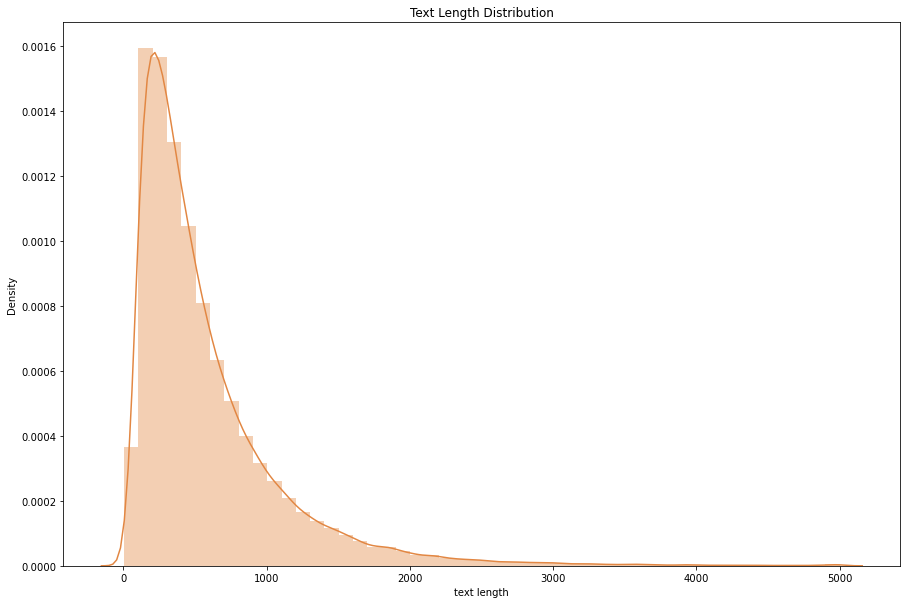

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.distplot(reviews['text length'], kde=True, bins=50, color='#e28743')
plt.title('Text Length Distribution')

# **DATA CLEANING**

**Then we select only the 'star' and 'text' columns for our analysis. These two columns provide all the information necessary to perform our analysis.**

In [ ]:
text = reviews[['stars','text']]
text.head()

stars                                               text
0    4.0  Apparently Prides Osteria had a rough summer a...
1    4.0  This store is pretty good. Not as great as Wal...
2    5.0  I called WVM on the recommendation of a couple...
3    2.0  I've stayed at many Marriott and Renaissance M...
4    4.0  The food is always great here. The service fro...

**We are doing some text cleaning in the cells below. We will do this by defining a function that can remove stopwords and punctuation, convert it to lowercase, and keep only English reviews. We will then make a copy of our 'cleaned_text' data to implement our function.**

In [ ]:
cachedStopWords = stopwords.words("english")

def remove_punc_stopword(text):

    remove_punc = [word for word in text.lower() if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word for word in remove_punc.split() if word not in cachedStopWords]

In [ ]:
cleaned_text = text.copy()
cleaned_text['text'] = text['text'].apply(remove_punc_stopword)
cleaned_text.head()

stars                                               text
0    4.0  [apparently, prides, osteria, rough, summer, e...
1    4.0  [store, pretty, good, great, walmart, preferre...
2    5.0  [called, wvm, recommendation, couple, friends,...
3    2.0  [ive, stayed, many, marriott, renaissance, mar...
4    4.0  [food, always, great, service, manager, well, ...

**Now we will create a word cloud chart and frequency numbers to extract information from reviews. While 5-star reviews are positive, we can call 1-star reviews negative. 3-star reviews are those that contain both positive and negative criticism at a similar rate. For this reason, it would not be right to associate three-star reviews with a single emotion and include them in this study.****Now we will create a word cloud chart and frequency numbers to extract information from reviews. While 5-star reviews are positive, we can call 1-star reviews negative. 3-star reviews are those that contain both positive and negative criticism at a similar rate. For this reason, it would not be right to associate three-star reviews with a single emotion and include them in this study.**

# **Detection of Most Common Words in Negative Comments**

We wrote a func that identifies the 20 most frequently used words in reviews.

In [ ]:
def plot_Freq(data):
    FreqDist(np.concatenate(data.text.reset_index(drop=True))).plot(20, cumulative=False)

We identified the 20 most frequently used words in negative reviews.

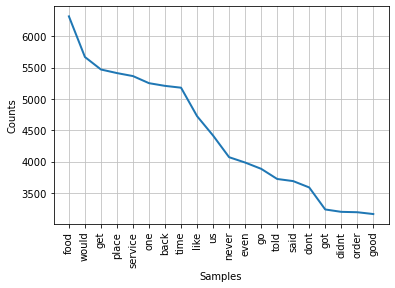

In [ ]:
plot_Freq(cleaned_text[cleaned_text['stars']==1])

We describe the function that generates a WordCloud() graph with the words most frequently used in negative reviews

In [ ]:
def reviewCloud(star):
    startext = ' '.join(text[text['stars']==star]['text'])
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black',
        stopwords = STOPWORDS).generate(str(startext))

    fig = plt.figure(
        figsize = (10, 7),
        facecolor = 'k',
        edgecolor = 'c')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)

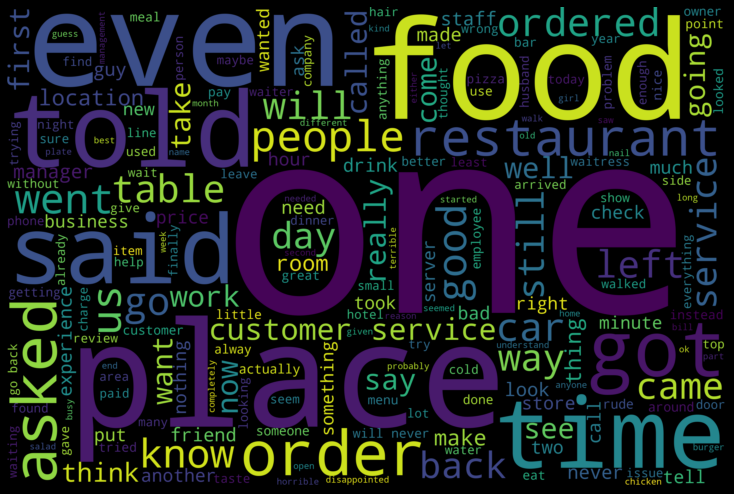

In [ ]:
reviewCloud(1)

In [ ]:
rev.loc[86353,:]

review_id                                 5ebBdavfoV-ErZEuf_62RQ
user_id                                   Lghn5Pk9JVXfDetoYzod4A
business_id                               iDcT8noFyv1sEVzzEWq1ow
stars                                                          5
useful                                                         1
funny                                                          1
cool                                                           1
text           This is one of your standard Chinese buffets. ...
date                                         2018-08-05 23:33:48
Name: 86353, dtype: object

Let's choose a restaurant using Business ID and collect all their reviews.

In [ ]:
restaurant = rev[rev.business_id==rev.loc[14544,:].business_id]
restaurant.head()

review_id                 user_id             business_id  \
5472   lsRsege54gdazajXOnbuug  DDnaZjXiCMtDG_SBbeMewQ  k-ou6U8a_jTcN3aq9HvuRA   
6486   OJbLlYGKZA15qvqOAAvVIw  NQn4xfxJ_-G5uPr15jQmXA  k-ou6U8a_jTcN3aq9HvuRA   
8622   jCqs3jcJ106fXjPLVhx1Jg  I8J5tiheti6meBlqJFiHWQ  k-ou6U8a_jTcN3aq9HvuRA   
9387   v8aTTZYOtsF7-GDEy3lGjg  ku58KfuRXbaSgAZrmmFbNg  k-ou6U8a_jTcN3aq9HvuRA   
14544  aqcv6MNigMPGUdQYgq51iw  BmE_IKPT54fw3qeraYKt5g  k-ou6U8a_jTcN3aq9HvuRA   

       stars  useful  funny  cool  \
5472     3.0       0      0     0   
6486     5.0       1      0     0   
8622     4.0       0      0     0   
9387     3.0       1      0     0   
14544    4.0       1      0     0   

                                                    text                 date  
5472   So my husband and I go here all the time and b...  2018-01-21 05:37:15  
6486   This is in a strip mall next to Mongolian BBQ ...  2010-08-22 00:27:57  
8622   Love the steamed chicken dumplings and the sin...  2016-03-31 00:13:51  
9387   I had sushi here, and it was alright. I got th...  2014-11-12 17:53:57  
14544  A friend and I checked out Blue Ginger this Sa...  2013-06-24 15:22:23

To understand what kind of food the restaurant sells

In [ ]:
selected_words = ['chinese', 'japanese', 'asian' , 'fastfood', 'seafood', 'steakhouse', 'mexican', 'thai', 
                  'turkish', 'diet','healthy']

We vectorize and convert to array

In [ ]:
vectorizer = CountVectorizer(vocabulary=selected_words, lowercase=False)

selected_word_count = vectorizer.fit_transform(restaurant['text'].values.astype('U'))
vectorizer.get_feature_names()

['chinese',
 'japanese',
 'asian',
 'fastfood',
 'seafood',
 'steakhouse',
 'mexican',
 'thai',
 'turkish',
 'diet',
 'healthy']

In [ ]:
word_count_array = selected_word_count.toarray()
word_count_array.shape

(27, 11)

Then we extract our features using the get_feature_names() function, convert them to a pandas dataframe, and aggregate them using the sum() function

<AxesSubplot:>

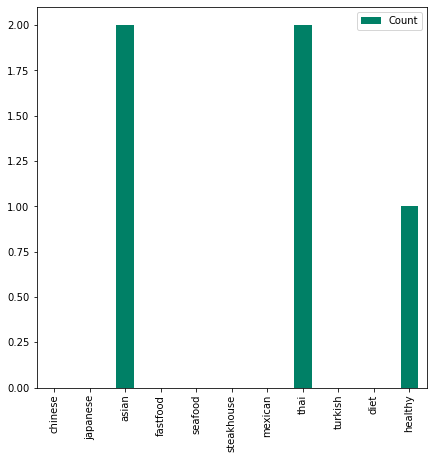

In [ ]:
rest = pd.DataFrame(index=vectorizer.get_feature_names(), \
                    data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})

rest.plot(kind='bar', stacked=False, figsize=[7,7], colormap='summer')

From here, we understand that the restaurant is serving Asian and Thai, healthy-style dishes.

In [ ]:
selected_words2 = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 
                  'awful', 'wow', 'hate' , 'delicious' , 'perfect', 'best', 'good' , 'happy']

In [ ]:
vectorizer = CountVectorizer(vocabulary=selected_words2, lowercase=False)

selected_word_count = vectorizer.fit_transform(restaurant['text'].values.astype('U'))
vectorizer.get_feature_names()

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate',
 'delicious',
 'perfect',
 'best',
 'good',
 'happy']

In [ ]:
word_count_array = selected_word_count.toarray()
word_count_array.shape

(27, 16)

In [ ]:
rest = pd.DataFrame(index=vectorizer.get_feature_names(), \
                    data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})

<AxesSubplot:>

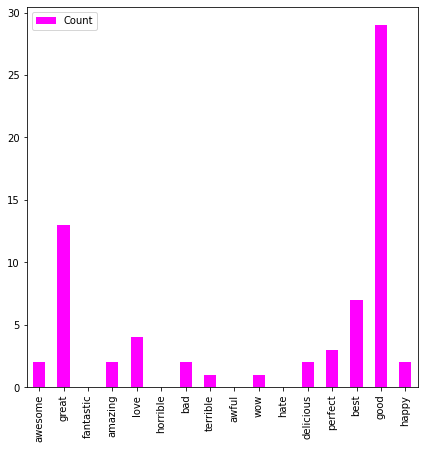

In [ ]:
rest.plot(kind='bar', stacked=False, figsize=[7,7], colormap='spring')

From this chart, we can understand that this restaurant is a preferable restaurant. The most used words are 'good' and 'great'
There are also bad reviews, but we see that they are in the minority.

# **Detection of Most Common Words in Positive Reviews**

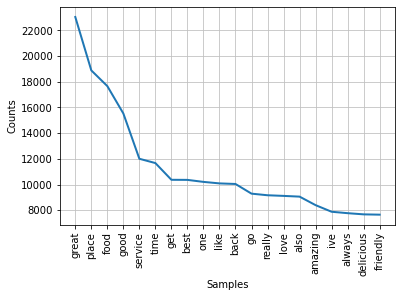

In [ ]:
def plot_Freq(data):
    FreqDist(np.concatenate(data.text.reset_index(drop=True))).plot(20, cumulative=False)
    
plot_Freq(cleaned_text[cleaned_text['stars']==5])

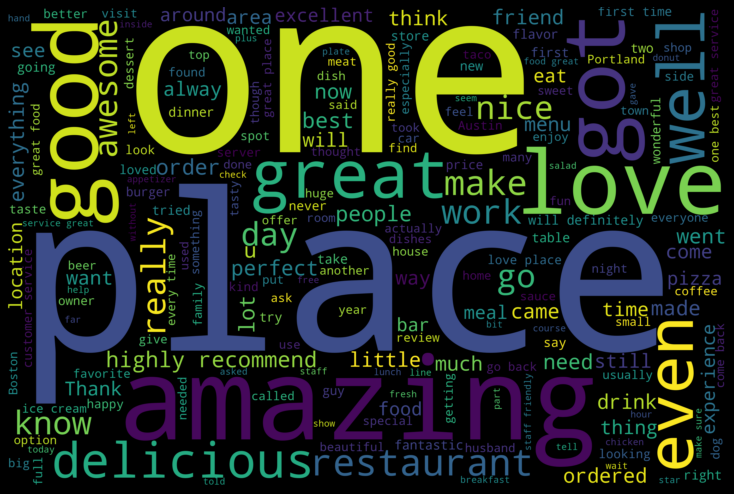

In [ ]:
def reviewCloud(star):
    startext = ' '.join(text[text['stars']==star]['text'])
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black',
        stopwords = STOPWORDS).generate(str(startext))

    fig = plt.figure(
        figsize = (10, 7),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    
reviewCloud(5)

# **MODELLING**

Next, we'll create a model to classify our reviews as positive or negative. For this we will only select '1' and '5' star ratings to train our model. We will split the dataset into x and y variables.

In [ ]:
select_stars = text[(text['stars']==1) | (text['stars']==5)]

In [ ]:
#START RUNNING FROM HERE IN DEEPNOTE
select_stars=pd.read_csv('SAdataset.csv')

In [ ]:
x = select_stars['text']
y = select_stars['stars']

# Using **CountVectorizer()**

It is imported from the sklearn.feature_extraction model.

It has pre_processing, tokenization and normalization methods.

It is used to convert a given text to a vector based on the frequency count of each word in the entire text. That is, the value of each cell is nothing but the number of words in that text.

The CountVectorizer() transformer does not take into account the corpus context. Another approach is required to evaluate the frequency of tokens in the document relative to their frequency in the other document.
(Example: TF-IDF -Term Frequency-Inverse Document Frequency)

In [ ]:
count_vec = CountVectorizer().fit(x)
x = count_vec.transform(x)

In [ ]:
print("Shape of the sparse matrix: ", x.shape)

Shape of the sparse matrix:  (53921, 55057)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# # **Random Forest**

Confusion Matrix for Random Forest:


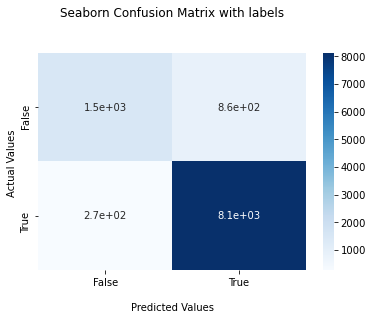

[[1528  857]
 [ 272 8128]]
Score: 89.53
Classification Report:               precision    recall  f1-score   support

         1.0       0.85      0.64      0.73      2385
         5.0       0.90      0.97      0.94      8400

    accuracy                           0.90     10785
   macro avg       0.88      0.80      0.83     10785
weighted avg       0.89      0.90      0.89     10785



In [ ]:
ranfor= RandomForestClassifier(n_estimators = 10, criterion = "entropy").fit(x_train,y_train)

ranfor_pred=ranfor.predict(x_test)


print("Confusion Matrix for Random Forest:")

import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test,ranfor_pred), annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

print(confusion_matrix(y_test,ranfor_pred))
print("Score:",round(accuracy_score(y_test,ranfor_pred)*100,2))
print("Classification Report:",classification_report(y_test,ranfor_pred))

# # **Logistic Regression**

Confusion Matrix for Logistic Regression:


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


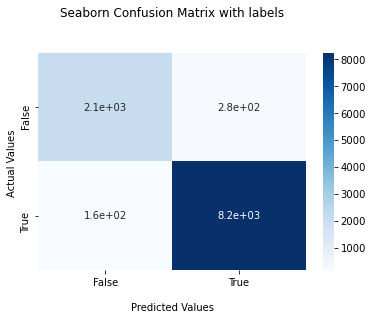

[[2106  279]
 [ 158 8242]]
Score: 95.95
Classification Report:               precision    recall  f1-score   support

         1.0       0.93      0.88      0.91      2385
         5.0       0.97      0.98      0.97      8400

    accuracy                           0.96     10785
   macro avg       0.95      0.93      0.94     10785
weighted avg       0.96      0.96      0.96     10785



In [ ]:
LR = LogisticRegression(C=0.01, solver='sag').fit(x_train,y_train)
LR_pred = LR.predict(x_test)

print("Confusion Matrix for Logistic Regression:")
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test,LR_pred), annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

print(confusion_matrix(y_test,LR_pred))
print("Score:",round(accuracy_score(y_test,LR_pred)*100,2))
print("Classification Report:",classification_report(y_test,LR_pred))

# Ada Boost

Confusion Matrix for AdaBoost:


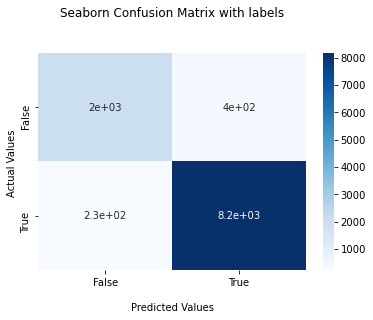

[[1983  402]
 [ 226 8174]]
Score: 94.18
Classification Report:               precision    recall  f1-score   support

         1.0       0.90      0.83      0.86      2385
         5.0       0.95      0.97      0.96      8400

    accuracy                           0.94     10785
   macro avg       0.93      0.90      0.91     10785
weighted avg       0.94      0.94      0.94     10785



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state = 0,n_estimators=100,learning_rate=1).fit(x_train,y_train)
ada_pred=ada.predict(x_test)

print("Confusion Matrix for AdaBoost:")
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test,ada_pred), annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

print(confusion_matrix(y_test,ada_pred))
print("Score:",round(accuracy_score(y_test,ada_pred)*100,2))
print("Classification Report:",classification_report(y_test,ada_pred))


* sag->95,95
* saga->95,93
* liblinear->95,52
* lbfgs->95,48
* newton-cg->95,48


In [ ]:
algos_countvec=[ "Logistic Regression", "Random Forest", "AdaBoost"]
predictions_countvec=[round(accuracy_score(y_test,LR_pred)*100,2),round(accuracy_score(y_test,ranfor_pred)*100,2),round(accuracy_score(y_test,ada_pred)*100,2)]

<AxesSubplot:>

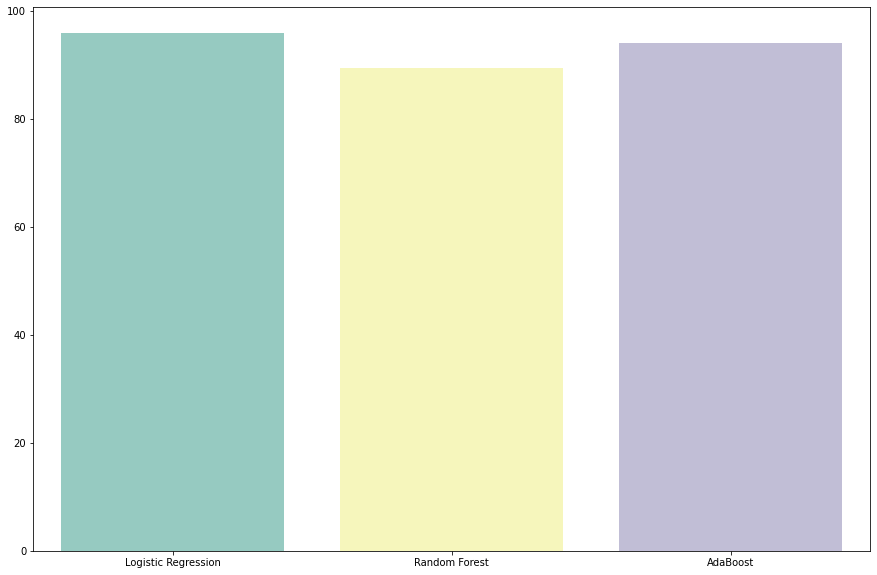

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(y = predictions_countvec, x = algos_countvec, palette = 'Set3')

# **Term Frequency–Inverse Document Frequency transformer(TF-IDF) **

The CountVectorizer() transformer does not take into account the corpus context. Another approach is required to evaluate the frequency of tokens in the document relative to their frequency in the other document. (Example: TF-IDF -Term Frequency-Inverse Document Frequency)

In [ ]:
tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x)

x_tfidf_train, x_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(x_tfidf,y, test_size=0.2, random_state=42)

# AdaBoost

Confusion Matrix for AdaBoost:


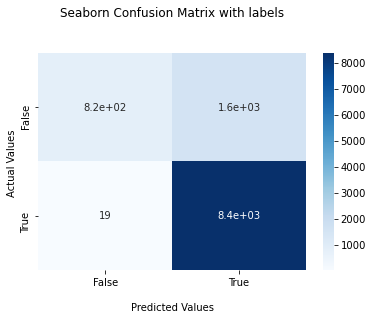

[[ 816 1569]
 [  19 8381]]
Score: 85.28
Classification Report:               precision    recall  f1-score   support

         1.0       0.98      0.34      0.51      2385
         5.0       0.84      1.00      0.91      8400

    accuracy                           0.85     10785
   macro avg       0.91      0.67      0.71     10785
weighted avg       0.87      0.85      0.82     10785



In [ ]:

adatfidf=AdaBoostClassifier(random_state = 0,n_estimators=100,learning_rate=1).fit(x_tfidf_train,y_tfidf_train)
ada_tfidf_pred = mnb_tfidf.predict(x_tfidf_test)

print("Confusion Matrix for AdaBoost:")
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_tfidf_test,ada_tfidf_pred), annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

print(confusion_matrix(y_tfidf_test,ada_tfidf_pred))
print("Score:",round(accuracy_score(y_tfidf_test,ada_tfidf_pred)*100,2))
print("Classification Report:",classification_report(y_tfidf_test,ada_tfidf_pred))



# # **Random Forest**

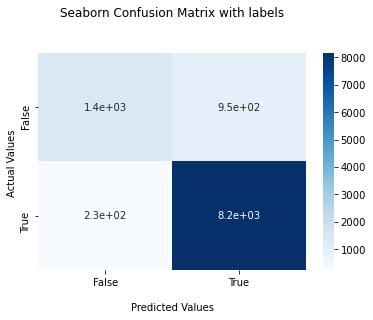

Confusion Matrix for Random Forest:
[[1434  951]
 [ 233 8167]]
Score: 89.02
Classification Report:               precision    recall  f1-score   support

         1.0       0.86      0.60      0.71      2385
         5.0       0.90      0.97      0.93      8400

    accuracy                           0.89     10785
   macro avg       0.88      0.79      0.82     10785
weighted avg       0.89      0.89      0.88     10785



In [ ]:
ranfor_tfidf= RandomForestClassifier(n_estimators = 10, criterion = "entropy").fit(x_tfidf_train,y_tfidf_train)

ranfor_tfidf_pred=ranfor_tfidf.predict(x_tfidf_test)

from sklearn.metrics import confusion_matrix


import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_tfidf_test,ranfor_tfidf_pred), annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_tfidf_test,ranfor_tfidf_pred))
print("Score:",round(accuracy_score(y_tfidf_test,ranfor_tfidf_pred)*100,2))
print("Classification Report:",classification_report(y_tfidf_test,ranfor_tfidf_pred))

# # **Logistic Regression**

Confusion Matrix for Logistic Regression:


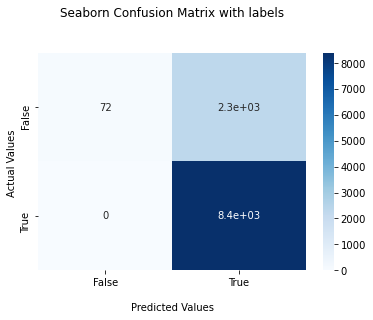

[[  72 2313]
 [   0 8400]]
Score: 78.55
Classification Report:               precision    recall  f1-score   support

         1.0       1.00      0.03      0.06      2385
         5.0       0.78      1.00      0.88      8400

    accuracy                           0.79     10785
   macro avg       0.89      0.52      0.47     10785
weighted avg       0.83      0.79      0.70     10785



In [ ]:
LR_tfidf = LogisticRegression(C=0.01, solver='newton-cg').fit(x_tfidf_train,y_tfidf_train)
LR_tfidf_pred = LR_tfidf.predict(x_tfidf_test)

print("Confusion Matrix for Logistic Regression:")
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_tfidf_test,LR_tfidf_pred), annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

print(confusion_matrix(y_tfidf_test,LR_tfidf_pred))
print("Score:",round(accuracy_score(y_tfidf_test,LR_tfidf_pred)*100,2))
print("Classification Report:",classification_report(y_tfidf_test,LR_tfidf_pred))

* sag, saga, newton-cg, liblinear, lbfgs->78,55

In [ ]:
algos_tfidf=["Logistic Regression", "Random Forest", "AdaBoost"]
predictions_tfidf=[round(accuracy_score(y_tfidf_test,LR_tfidf_pred)*100,2),round(accuracy_score(y_tfidf_test,ranfor_tfidf_pred)*100,2),round(accuracy_score(y_tfidf_test,ada_tfidf_pred)*100,2)]

<AxesSubplot:>

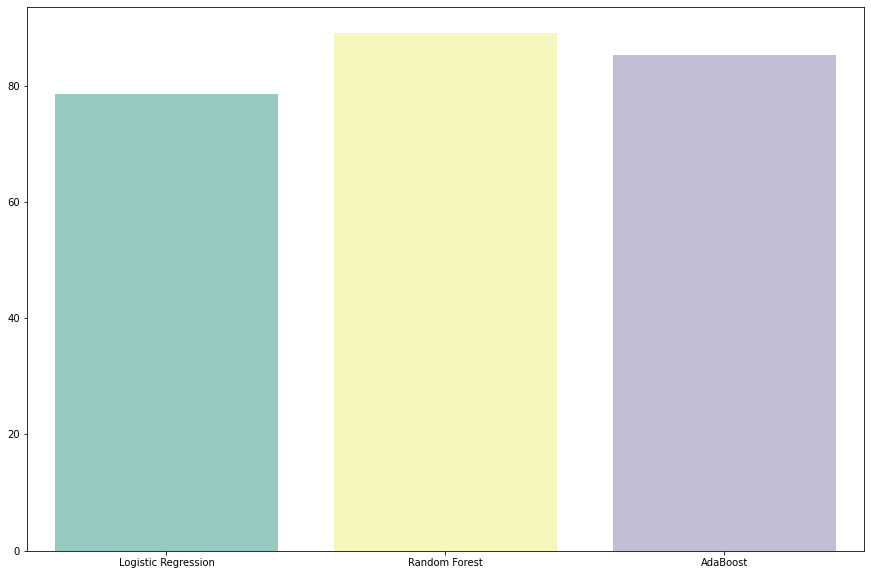

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(y = predictions_tfidf, x = algos_tfidf, palette = 'Set3')

In [ ]:
combining=list(set(algos_countvec).intersection(algos_tfidf))
combining

['AdaBoost', 'Logistic Regression', 'Random Forest']

In [ ]:
algos=["Logistic Regression", "Random Forest", "AdaBoost"]
predictions_tfidf=[round(accuracy_score(y_tfidf_test,LR_tfidf_pred)*100,2),round(accuracy_score(y_tfidf_test,ranfor_tfidf_pred)*100,2),round(accuracy_score(y_tfidf_test,ada_tfidf_pred)*100,2)]
predictions_countvec=[round(accuracy_score(y_test,LR_pred)*100,2),round(accuracy_score(y_test,ranfor_pred)*100,2),round(accuracy_score(y_test,ada_pred)*100,2)]
dict={'Algorithms': algos, 'TF-IDF ACCURACY': predictions_tfidf, 'CV ACCURACY:': predictions_countvec}
acc_df = pd.DataFrame(dict) 
acc_df

Algorithms  TF-IDF ACCURACY  CV ACCURACY:
0  Logistic Regression            78.55         95.95
1        Random Forest            89.02         89.53
2             AdaBoost            85.28         94.18

# best accuracy by logistic regression : 95.95  (COUNT VECTORISER)
# PICKLING THE MODEL:

In [ ]:
import pickle
# Pickling the classifier
with open("SentimentClassifier.pickle","wb") as f:
    pickle.dump(LR,f)

with open("Sentiment_cv.pickle","wb") as f:
    pickle.dump(count_vec,f)
# this pickle file is saved so that it can be used with the mapper 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d611ce83-46e4-4a42-b601-819324222ef9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>